# **GRADED ASSIGNMENT 3 - Task 2**

This is a programming task dedicated to SVD.

First, make your own copy of the notebook (*File $\rightarrow$ Save a copy in Drive*) or download the notebook to your machine if you prefer to work locally (*File $\rightarrow$ Download*).

Then, implement your solutions to the tasks formulated in the notebook. You can add **code cells** to write some code and **text cells** in case you want to include additional explanations to your answers in plain English.

Finally, attach the link to thi snotebook the submission form. **Make sure that all the cells are executed and all relevant outputs are being printed out**.


## Image compression with SVD

We have seen that SVD allows one to decompose any $m \times n$ matrix $A$, into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

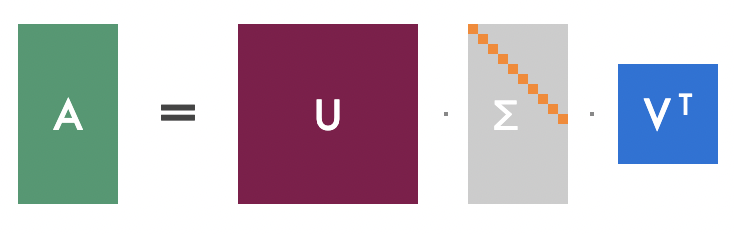

We have also discussed that we can *approximate* the original matrix $A$ by using only some parts of the matrices $U, V$ and $\Sigma$:

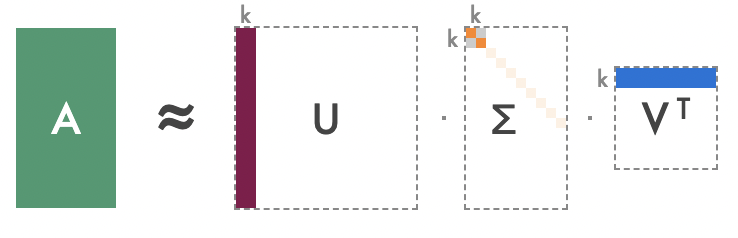

You can notice that this approximation can help us save quite a lot of space. Indeed, inspeat of storing $m \times n$ of the original values in A we now need to store only $m \times k + k + k \times n = k \times (m + n + 1)$ values. **Since images can be represented as matrices of pixel values, we can use this idea and compress images with SVD!**

Here are some videos that explain this idea and give some examples that you might want to watch before attempting the task:
- [SVD and Image Compression](https://youtu.be/DG7YTlGnCEo)
- [SVD: Image Compression in Python](https://youtu.be/H7qMMudo3e8)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, let's load the image into a $\texttt{numpy}$ array and display it.

You can use *any* image of your choice, or upload one of the sample images provided [in our repo](https://github.com/girafe-ai/math-basics-for-ai/tree/master/graded%20assignments/img).

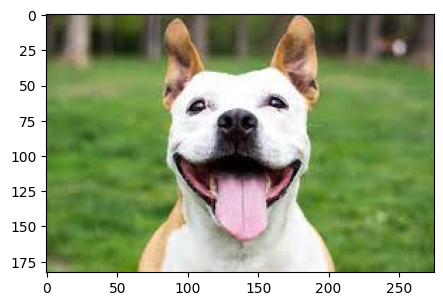

In [68]:
path = '/home/andrei/PycharmProjects/Girafe/math/homework/girafe/dog.jpeg'

img_rgb = plt.imread(path)

plt.figure(figsize=(5, 10))
plt.imshow(img_rgb)

Note how image is represented in the RGB format:

In [69]:
print(img_rgb.shape)
img_rgb

(183, 275, 3)


array([[[ 60,  43,  49],
        [ 61,  47,  47],
        [ 63,  49,  46],
        ...,
        [ 89,  78,  74],
        [ 89,  78,  74],
        [ 89,  78,  74]],

       [[ 63,  46,  52],
        [ 63,  49,  49],
        [ 66,  52,  49],
        ...,
        [ 90,  79,  75],
        [ 90,  79,  75],
        [ 90,  79,  75]],

       [[ 67,  50,  56],
        [ 67,  53,  53],
        [ 70,  56,  53],
        ...,
        [ 91,  80,  76],
        [ 91,  80,  76],
        [ 91,  80,  76]],

       ...,

       [[134, 152,  90],
        [135, 153,  91],
        [136, 154,  94],
        ...,
        [ 67, 107,  36],
        [ 66, 108,  34],
        [ 66, 108,  34]],

       [[130, 151,  86],
        [130, 152,  87],
        [133, 153,  90],
        ...,
        [ 66, 106,  35],
        [ 65, 107,  33],
        [ 65, 107,  33]],

       [[124, 147,  79],
        [123, 148,  80],
        [128, 150,  85],
        ...,
        [ 66, 106,  35],
        [ 65, 107,  33],
        [ 65, 107,  33]]

For simplicity, let's make our image black-and-white (this way, we'll only need to work with a single channel). We'll do this by averaging the signals from the red, green and blue channels for each pixel.

In [70]:
img_grayscale = np.mean(img_rgb, axis=-1)

Now, our image is represented as an $m \times n$ matrix:

In [71]:
print(img_grayscale.shape)
img_grayscale

(183, 275)


array([[ 50.66666667,  51.66666667,  52.66666667, ...,  80.33333333,
         80.33333333,  80.33333333],
       [ 53.66666667,  53.66666667,  55.66666667, ...,  81.33333333,
         81.33333333,  81.33333333],
       [ 57.66666667,  57.66666667,  59.66666667, ...,  82.33333333,
         82.33333333,  82.33333333],
       ...,
       [125.33333333, 126.33333333, 128.        , ...,  70.        ,
         69.33333333,  69.33333333],
       [122.33333333, 123.        , 125.33333333, ...,  69.        ,
         68.33333333,  68.33333333],
       [116.66666667, 117.        , 121.        , ...,  69.        ,
         68.33333333,  68.33333333]])

We can plot the grayscale image:

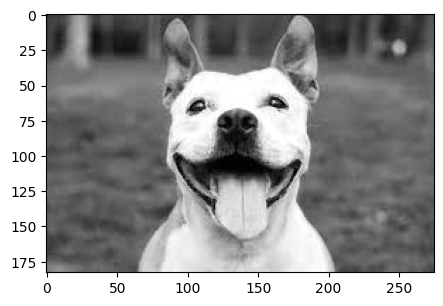

In [72]:
plt.figure(figsize=(5, 10))
plt.imshow(img_grayscale, cmap='gray')

Apply SVD on the image matrix $M$, decomposing it into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

$$M_{m \times n} = U_{m \times m} \Sigma_{m \times n} V_{n \times n}^T$$

*You can use [$\texttt{np.linalg.svd()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to perform SVD.*

In [73]:
U, sigma, Vt = np.linalg.svd(img_grayscale, full_matrices=False)


In [74]:
U.shape, sigma.shape, Vt.shape

((183, 183), (183,), (183, 275))

**(2 points)** Demonstrate how you can get your image matrix back as a product of $U$, $V$ and $\Sigma$ *(express image matrix $M$ as a product of the three matrices and plot the resulting image, making sure it's the same as before)*.

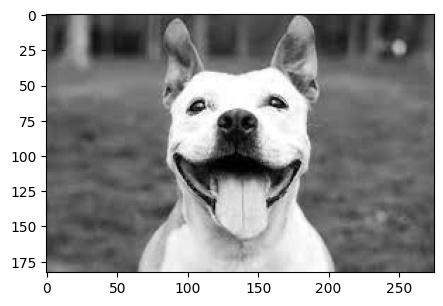

In [75]:
img_reconstructed = np.dot(U, np.dot(np.diag(sigma), Vt))

plt.figure(figsize=(5, 10))
plt.imshow(img_reconstructed, cmap='gray')

Now, let's compress the original image! Remember that with SVD, you can approximate the original  matrix by considering only $p$ of the hidden features:

$$M_{m \times n} \approx U_{m \times p} \Sigma_{p \times p} V_{n \times p}^T$$

**(3 points)** Try reconstructing the image by using only $5, 10, ..., 100$ hidden features. Plot what happens.

*Hint: use [$\texttt{plt.subplot()}$](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to place several images on the same plot.*

In [76]:
# Define the values of p to try
p_values = [5, 10, 20, 50, 100]
reconstructed_images = []

# Reconstruct the image using different numbers of hidden features
for p in p_values:
    # Create the diagonal matrix for the singular values
    S_p = np.zeros((U.shape[1], Vt.shape[0]))
    S_p[:p, :p] = np.diag(sigma[:p])
    
    # Reconstruct the image
    M_reconstructed = U @ S_p @ Vt
    reconstructed_images.append(M_reconstructed)



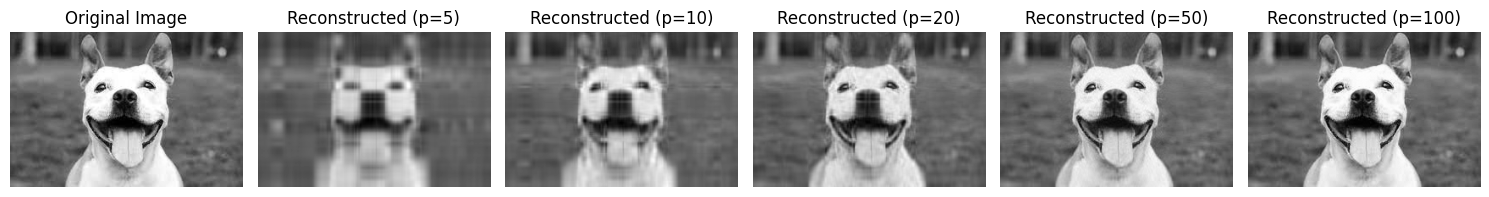

In [77]:
# Plot the original and reconstructed images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, len(p_values) + 1, 1)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed images
for i, p in enumerate(p_values):
    plt.subplot(2, len(p_values) + 1, i + 2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Reconstructed (p={p})')
    plt.axis('off')

plt.tight_layout()
plt.show()